1) Kütüphaneler

In [31]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


2) Veriyi Okuma

In [32]:
df = pd.read_csv("data.csv")
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


3) Veri Yapısını Kontrol Etme

In [33]:
print(df.shape)
df.info()
df.describe()


(569, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se    

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


4) Gereksiz Sütunları Kaldırma

In [34]:
df.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [35]:
drop_cols = [c for c in ["id", "Unnamed: 32"] if c in df.columns]
df.drop(columns=drop_cols, inplace=True)

df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


5) Hedef Değişkeni (Diagnosis) Sayısallaştırma.                        
1 = kötü huylu (M)
0 = iyi huylu (B)


In [36]:
df["diagnosis"].value_counts()


,count
diagnosis,
B,357
M,212


In [37]:
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})
df["diagnosis"].value_counts()


,count
diagnosis,
0,357
1,212


6) Eksik Veri Kontrolü                   
sadece eksik değer olan sütunları yazdır

In [38]:
df.isnull().sum()[df.isnull().sum() > 0]


,0


7)Eksik Veri Doldurma       


Veri setinde eksik değer bulunmadı. Ancak eksik değer bulunması durumunda, sayısal değişkenler için ortalama (mean) değeri kullanarak veri tamamlama işlemi uygulayacaktık.

In [39]:
# for col in df.select_dtypes(include=np.number).columns:
#     df[col].fillna(df[col].mean(), inplace=True)

8) Korelasyon Isı Haritası (EDA)

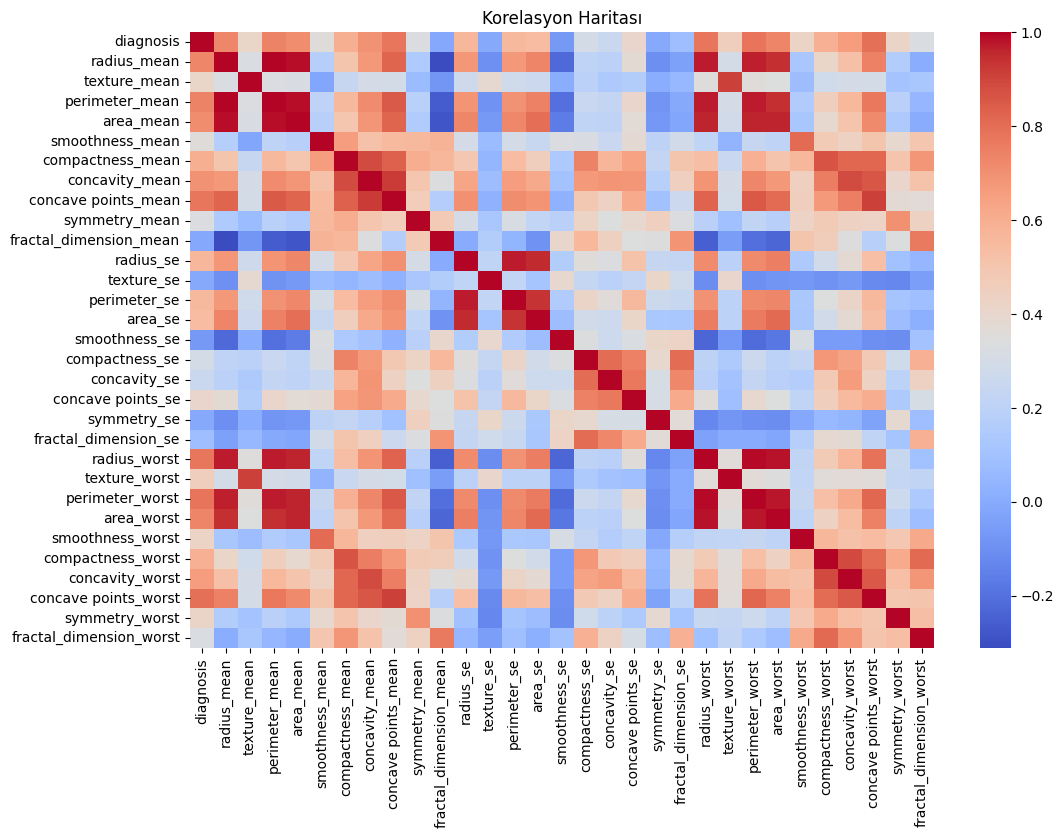

In [40]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")
plt.title("Korelasyon Haritası")
plt.show()


9) X ve y Ayrımı

In [41]:
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]


10) Train-Test Split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


11) Scaler (StandardScaler)

In [43]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


12) Lojistik Regresyon

In [44]:
lr = LogisticRegression(max_iter=2000)

lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
y_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]

lr_acc = accuracy_score(y_test, y_pred_lr)
lr_auc = roc_auc_score(y_test, y_proba_lr)

print("Logistic Regression Accuracy:", lr_acc)
print("Logistic Regression ROC-AUC:", lr_auc)


Logistic Regression Accuracy: 0.9649122807017544
Logistic Regression ROC-AUC: 0.996031746031746


13) SVM

In [45]:
svm = SVC(kernel="rbf", probability=True)

svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)
y_proba_svm = svm.predict_proba(X_test_scaled)[:, 1]

svm_acc = accuracy_score(y_test, y_pred_svm)
svm_auc = roc_auc_score(y_test, y_proba_svm)

print("SVM Accuracy:", svm_acc)
print("SVM ROC-AUC:", svm_auc)


SVM Accuracy: 0.9736842105263158
SVM ROC-AUC: 0.9947089947089947


14) KNN

In [46]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)
y_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]

knn_acc = accuracy_score(y_test, y_pred_knn)
knn_auc = roc_auc_score(y_test, y_proba_knn)

print("KNN Accuracy:", knn_acc)
print("KNN ROC-AUC:", knn_auc)


KNN Accuracy: 0.956140350877193
KNN ROC-AUC: 0.982308201058201


15) Random Forest

In [47]:
rf = RandomForestClassifier(n_estimators=300, random_state=42)

rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)
y_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

rf_acc = accuracy_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, y_proba_rf)

print("Random Forest Accuracy:", rf_acc)
print("Random Forest ROC-AUC:", rf_auc)


Random Forest Accuracy: 0.9736842105263158
Random Forest ROC-AUC: 0.9943783068783069


16) Karşılaştırma Tablosu

In [48]:
results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "SVM", "KNN", "Random Forest"],
    "Accuracy": [lr_acc, svm_acc, knn_acc, rf_acc],
    "ROC-AUC": [lr_auc, svm_auc, knn_auc, rf_auc]
}).sort_values(by="Accuracy", ascending=False)

results_df


,Model,Accuracy,ROC-AUC
1,SVM,0.973684,0.994709
3,Random Forest,0.973684,0.994378
0,Logistic Regression,0.964912,0.996032
2,KNN,0.956140,0.982308


17) Modellerin Grafikle Karşılaştırılması

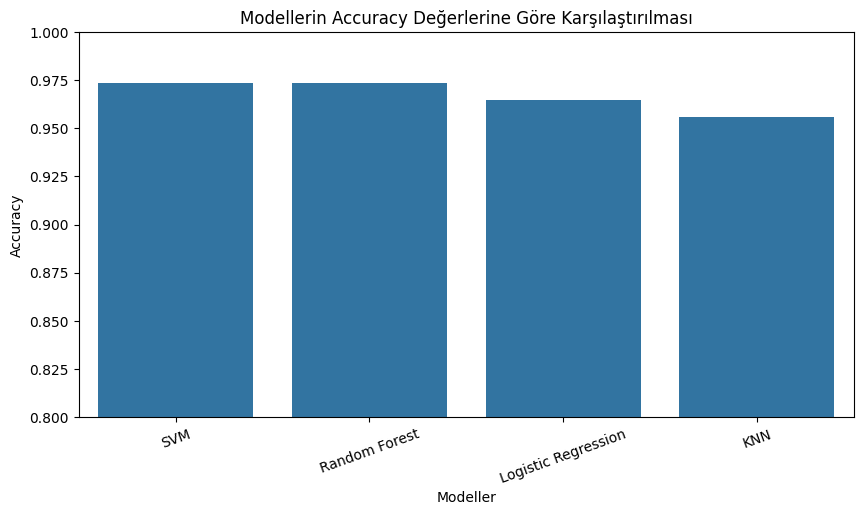

In [49]:
plt.figure(figsize=(10,5))
sns.barplot(x=results_df["Model"], y=results_df["Accuracy"])
plt.title("Modellerin Accuracy Değerlerine Göre Karşılaştırılması")
plt.xlabel("Modeller")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.xticks(rotation=20)
plt.show()


18) En İyi Modeli Seçme + Classification Report + Confusion Matrix


In [50]:
model_objects = {
    "Logistic Regression": lr,
    "SVM": svm,
    "KNN": knn,
    "Random Forest": rf
}
best_model_name = results_df.iloc[0]["Model"]
best_model = model_objects[best_model_name]

print("Seçilen en iyi model:", best_model_name)


Seçilen en iyi model: SVM


In [51]:
y_pred_best = best_model.predict(X_test_scaled)

from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_test, y_pred_best))

Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



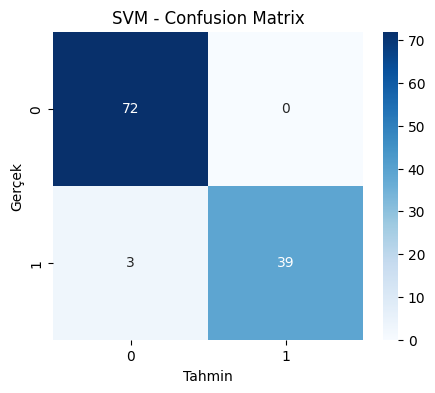

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"{best_model_name} - Confusion Matrix")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.show()
